In [61]:
#import necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#dataset
data = pd.read_table("201028_GSE122505_Leukemia_clean.txt", sep = "\t")

In [2]:
#table of the disease
data.disease.value_counts()

AML                                         969
ALL                                         906
Infection                                   113
CLL                                          85
healthy                                      82
Diabetes_Type_I                              74
AMKL                                         63
Diabetes_Type_II                             29
CML                                          22
clinically_isolated_syndrome                 18
MDS                                          10
DS_transient_myeloproliferative_disorder      8
Name: disease, dtype: int64

In [60]:
#removing some disease type
data["disease"] = np.where(data["disease"] == "Diabetes_Type_I" , "Diabetes", data["disease"])
data["disease"] = np.where(data["disease"] == "Diabetes_Type_II" , "Diabetes", data["disease"])
other = ['CML','clinically_isolated_syndrome', 'MDS', 'DS_transient_myeloproliferative_disorder']
data = data[~data.disease.isin(other)]
data.disease.value_counts()

AML    969
ALL    906
Name: disease, dtype: int64

In [31]:
selected = ['AML','ALL']
data = data[data.disease.isin(selected)]
data.disease.value_counts()

AML    969
ALL    906
Name: disease, dtype: int64

In [49]:
target = data["disease"]
df = data.drop("disease", 1)
df = df.drop("GSM", 1)
df = df.drop("FAB", 1)
df.shape

(1875, 14208)

In [36]:
df = df.drop(df.var()[(df.var() < 0.3)].index, axis=1)
from scipy.stats import zscore
df = df.apply(zscore)
df.shape

(1875, 4252)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#inputs and dependent variable
X = df.drop("MYC", 1)
y = df["MYC"]
#dividing in train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

No handles with labels found to put in legend.


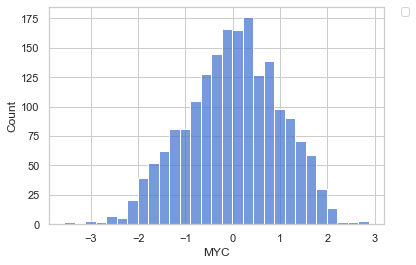

In [13]:
sns.set(style="whitegrid", palette="muted")
sns.histplot(data=y, x=y)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [108]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit(X_train, y_train)

PolynomialFeatures()

In [109]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(poly, LinearRegression())

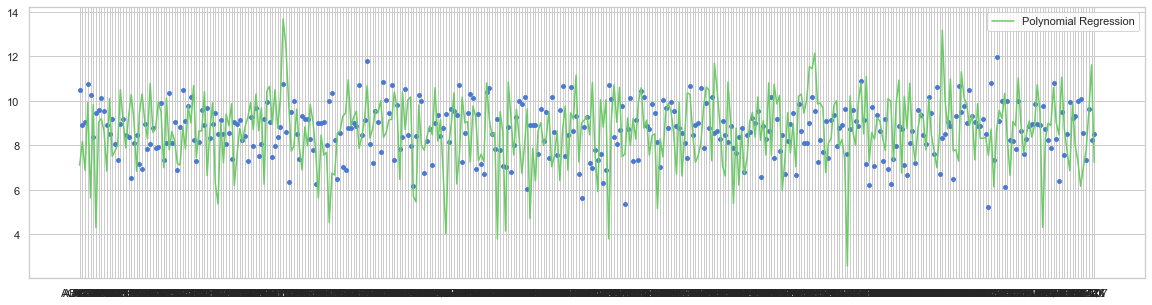

In [140]:
poly_model.fit(X_train.iloc[:, 0:100], y_train)
yfit = poly_model.predict(X_test.iloc[:, 0:100])

plt.figure(figsize=(20,5))
plt.scatter(x_ax, y_test,s=15)
plt.plot(x_poly,poly_pred,color='g',label='Polynomial Regression')
plt.legend()
plt.show()

In [136]:
# RMSE (Root Mean Squared Error) 
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error( y_test,poly_pred)))

RMSE for Polynomial Regression=> 1.9117615534595738
